# Visualización de Base de Datos de Exoplanetas


![alt text](https://ep01.epimg.net/portadillasetiquetas/imagenes/2017/02/23/portadilla/1487865835_992873_1487865974_portadilla_normal.jpg)

# Motivación 

La investigación de planetas extra solares es una área de la astronomía que a crecido debido al lanzamiento de nuevos y poderosos observatorios astronómicos espaciales, así mismo la cantidad de datos que estas investigaciones arrojan han crecido bastante, a continuación se muestra la visualización de una base de datos que cataloga las características observadas en los planetas extra solares que se han descubierto.
[Fuente](http://exoplanet.eu/catalog/all_fields/)

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
df = pd.read_csv('exoplanet.csv')

# Exploración de Datos

In [0]:
df.head()

,# name,planet_status,mass,mass_error_min,mass_error_max,mass_sini,mass_sini_error_min,mass_sini_error_max,radius,radius_error_min,radius_error_max,orbital_period,orbital_period_error_min,orbital_period_error_max,semi_major_axis,semi_major_axis_error_min,semi_major_axis_error_max,eccentricity,eccentricity_error_min,eccentricity_error_max,inclination,inclination_error_min,inclination_error_max,angular_distance,discovered,updated,omega,omega_error_min,omega_error_max,tperi,tperi_error_min,tperi_error_max,tconj,tconj_error_min,tconj_error_max,tzero_tr,tzero_tr_error_min,tzero_tr_error_max,tzero_tr_sec,tzero_tr_sec_error_min,...,geometric_albedo,geometric_albedo_error_min,geometric_albedo_error_max,log_g,publication,detection_type,mass_detection_type,radius_detection_type,alternate_names,molecules,star_name,ra,dec,mag_v,mag_i,mag_j,mag_h,mag_k,star_distance,star_distance_error_min,star_distance_error_max,star_metallicity,star_metallicity_error_min,star_metallicity_error_max,star_mass,star_mass_error_min,star_mass_error_max,star_radius,star_radius_error_min,star_radius_error_max,star_sp_type,star_age,star_age_error_min,star_age_error_max,star_teff,star_teff_error_min,star_teff_error_max,star_detected_disc,star_magnetic_field,star_alternate_names
0,11 Com b,Confirmed,19.40,1.50,1.50,19.40,1.50,1.50,NaN,NaN,NaN,326.03,0.32,0.32,1.29,0.05,0.05,0.231,0.005,0.005,NaN,NaN,NaN,0.011664,2008.0,2015-08-21,94.80,1.50,1.50,2452899.60,1.60,1.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Published in a refereed paper,Radial Velocity,NaN,NaN,NaN,NaN,11 Com,185.179167,17.792778,4.74,NaN,NaN,NaN,NaN,110.6,10.5,10.5,-0.35,0.09,0.09,2.7000,0.300,0.300,19.000,2.000,2.000,G8 III,NaN,NaN,NaN,4742.0,100.0,100.0,NaN,NaN,NaN
1,11 Oph b,Confirmed,21.00,3.00,3.00,NaN,NaN,NaN,NaN,NaN,NaN,730000.00,365000.00,365000.00,243.00,55.00,55.00,NaN,NaN,NaN,NaN,NaN,NaN,1.675862,2007.0,2018-06-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Published in a refereed paper,Imaging,NaN,NaN,Oph 1622-2405 b,NaN,11 Oph,245.604167,-24.087222,NaN,NaN,NaN,NaN,14.03,145.0,20.0,20.0,NaN,NaN,NaN,0.0162,0.005,0.005,NaN,NaN,NaN,M9,0.011,0.002,0.002,2375.0,175.0,175.0,NaN,NaN,"Oph 11A, Oph 1622-2405"
2,11 UMi b,Confirmed,10.50,2.47,2.47,10.50,2.47,2.47,NaN,NaN,NaN,516.22,3.25,3.25,1.54,0.07,0.07,0.080,0.030,0.030,NaN,NaN,NaN,0.012887,2009.0,2009-08-13,117.63,21.06,21.06,2452861.05,2.06,2.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Published in a refereed paper,Radial Velocity,NaN,NaN,NaN,NaN,11 UMi,229.275000,71.823889,5.02,NaN,NaN,NaN,NaN,119.5,6.9,6.9,0.04,0.04,0.04,1.8000,0.250,0.250,24.080,1.840,1.840,K4III,1.560,0.540,0.540,4340.0,70.0,70.0,NaN,NaN,NaN
3,14 And b,Confirmed,5.33,0.57,0.57,5.33,0.57,0.57,NaN,NaN,NaN,185.84,0.23,0.23,0.83,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,0.010864,2008.0,2014-08-27,NaN,NaN,NaN,2452861.40,1.50,1.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Published in a refereed paper,Radial Velocity,NaN,NaN,NaN,NaN,14 And,352.820833,39.236111,5.22,4.1,3.02,2.61,2.33,76.4,4.1,4.1,-0.24,NaN,NaN,2.2000,0.200,0.200,11.000,1.000,1.000,K0III,NaN,NaN,NaN,4813.0,20.0,20.0,NaN,NaN,NaN
4,14 Her b,Confirmed,4.64,0.19,0.19,4.64,0.19,0.19,NaN,NaN,NaN,1773.40,2.50,2.50,2.77,0.05,0.05,0.369,0.005,0.005,NaN,NaN,NaN,0.153039,2002.0,2014-08-27,22.60,0.90,0.90,2451372.70,3.60,3.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Published in a refereed paper,Radial Velocity,NaN,NaN,NaN,NaN,14 Her,242.595833,43.821667,6.67,NaN,NaN,NaN,NaN,18.1,NaN,NaN,0.43,0.08,0.08,0.9000,NaN,NaN,0.708,0.085,0.085,K0 V,5.100,NaN,NaN,5311.0,87.0,87.0,NaN,NaN,NaN


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4069 entries, 0 to 4068
Data columns (total 98 columns):
# name                        4069 non-null object
planet_status                 4069 non-null object
mass                          1893 non-null float64
mass_error_min                1685 non-null float64
mass_error_max                1676 non-null float64
mass_sini                     937 non-null float64
mass_sini_error_min           780 non-null float64
mass_sini_error_max           780 non-null float64
radius                        3027 non-null float64
radius_error_min              2921 non-null float64
radius_error_max              2921 non-null float64
orbital_period                3859 non-null float64
orbital_period_error_min      3724 non-null float64
orbital_period_error_max      3725 non-null float64
semi_major_axis               2555 non-null float64
semi_major_axis_error_min     1548 non-null float64
semi_major_axis_error_max     1548 non-null float64
eccentricity  

# ¿Cuál es el sistema planetario más lejano detectado ?  

In [0]:
df[df['star_distance']==df['star_distance'].max()]['# name']

4018    XTE J1751-305 b
Name: # name, dtype: object

# ¿Cuál es el sistema planetario más cercano detectado?  

In [0]:
df[df['star_distance']==df['star_distance'].min()]['# name']

3736    Proxima Centauri b
Name: # name, dtype: object

# ¿Cuál es el nombre del planeta con mayor excentricidad y cuál es su valor?

In [0]:
a1=df[df['eccentricity']==df['eccentricity'].max()]['# name'].astype(str)
b1=df['eccentricity'].max().astype(str)
print(a)
print('Tiene excentricidad de: {b}'.format(b=b))

3710    Oumuamua
Name: # name, dtype: object
Tiene excentricidad de: 1.196


# ¿Cuál es la masa promedio? 

In [0]:
df['mass'].mean()

5.1066646236088085

# ¿Se relaciona la masa de los planetas con su radio? ¿Qué nos dice esto acerca de las composiciones de los planetas?

Para comprar los datos debemos tener algo con que comparar, para esto se va tener en cuenta las cantidades de la Tierra.

In [0]:
MJ=1.9*(10)**(27)
MT=5.9*(10)**(24)
m=MT/MJ
RJ=69.911
RT=6.371
r=RT/RJ

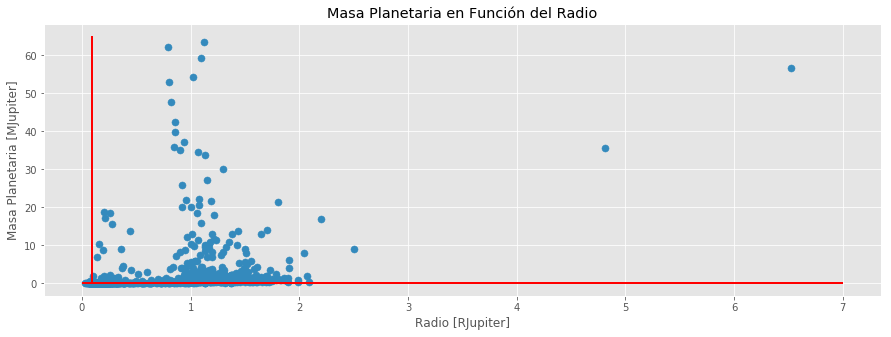

In [0]:
plt.style.use('ggplot')
#ax = df.plot(kind='scatter', x='radius',y='mass', logx=True, s=50, figsize=(15,5))
ax = df.plot(kind='scatter', x='radius',y='mass', s=50, figsize=(15,5))
ax.set_xlabel("Radio [RJupiter]")
ax.set_ylabel("Masa Planetaria [MJupiter]")
ax.set_title("Masa Planetaria en Función del Radio")
ax.hlines(y=m, xmin=0, xmax=7, linewidth=2, color='r')
ax.vlines(x=r, ymin=0, ymax=65, linewidth=2, color='r')

Se observa que para planetas con Masas y Radios parecidos a la tierra se tienen planetas rocosos y para planetas con característica como las de Júpiter se tiene planetas gaseosos o planetas con núcleo rocoso, debido a la gravedad y una atmosfera muy gruesa.   

 

# ¿Cómo se relaciona los métodos de detección con los datos?

La distribución de datos se tiene debido a la naturaleza de los métodos de detección.

In [0]:
df = df.rename(columns={'detection_type': 'Método de Detección'})
#df.info()

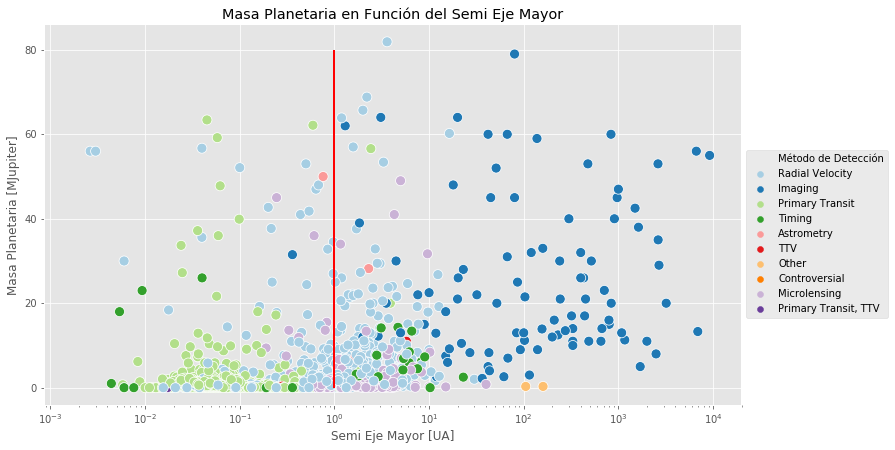

In [0]:
a4_dims = (12.5, 7)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.scatterplot(ax=ax, x="semi_major_axis", y="mass", hue="Método de Detección", data=df, palette='Paired', s=100)
ax.set_xlabel("Semi Eje Mayor [UA]")
ax.set_ylabel("Masa Planetaria [MJupiter]")
ax.set_title("Masa Planetaria en Función del Semi Eje Mayor")
ax.semilogx()
ax.vlines(x=1, ymin=0, ymax=80, linewidth=2, color='r')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.45))


Se observa que los métodos de detección tienen límites ahora de observar los diferentes tipos de planetas.

# ¿Se detectan planetas en todos los tipos de espectro de las estrellas?  

![Tipos de Espectro](http://k36.kn3.net/E0CF6C6C0.jpg)



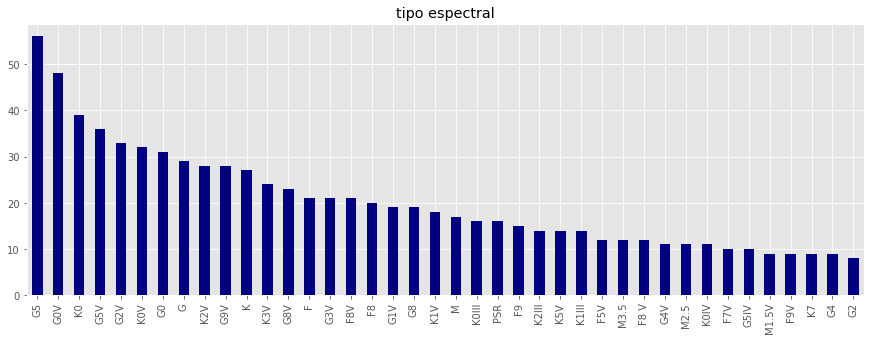

In [0]:
df['star_sp_type'].value_counts().head(40).plot(kind='bar',title='tipo espectral',figsize=(15,5), color='navy')

In [0]:
df['Método de Detección'].value_counts()

Primary Transit         2945
Radial Velocity          838
Imaging                  126
Microlensing              95
Timing                    42
Astrometry                 8
TTV                        8
Other                      4
Primary Transit, TTV       2
Controversial              1
Name: Método de Detección, dtype: int64

# Tercer Ley de Keppler $T^2=C a^3$

Según la mecánica celeste clásica estos planetas deben cumplir con que  el cuadrado del Periodo es proporcional al cubo del Semieje Mayor.

In [0]:
df['orbital_period']=df['orbital_period'].apply(lambda x: x*x )

df['semi_major_axis']=df['semi_major_axis'].apply(lambda x: x*x*x )

Text(0.5, 1.0, 'Periodo Orbital al Cuadrado en Función del SemiEje Mayor')

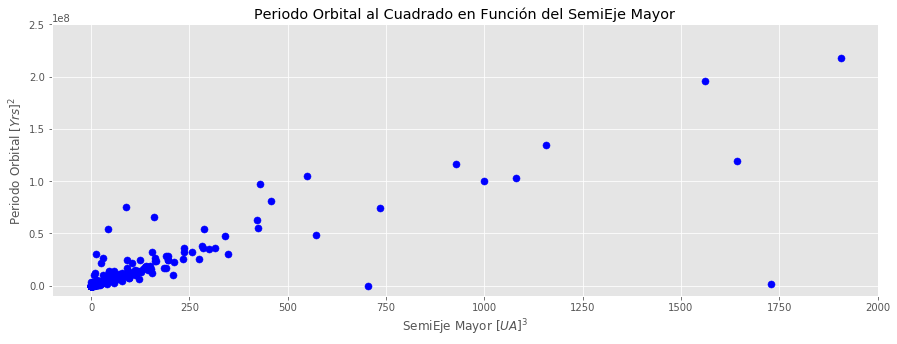

In [0]:
ax = df.plot(kind='scatter', x='semi_major_axis', y='orbital_period', s=50, figsize=(14.8,5),logx=False, color='b')
ax.set_xlim(-100, 2000)
ax.set_ylim(-10**7, 2.5*10**8)
ax.set_xlabel("SemiEje Mayor $[UA]^3$")
ax.set_ylabel("Periodo Orbital $[Yrs]^2$")
ax.set_title("Periodo Orbital al Cuadrado en Función del SemiEje Mayor")